In [18]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# File paths
input_file = "../data/combined_weather_data.csv"
processed_file = "../data/processed_weather_data.csv"

In [13]:
df = pd.read_csv(input_file, encoding='utf-8')
print("Initial Data Info:\n", df.info())

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df.dropna(subset=["Date"], inplace=True)
df.drop_duplicates(inplace=True)

numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in numeric_cols:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

df.fillna(df.median(numeric_only=True), inplace=True)
print("Final Data Info:\n", df.info())
df.to_csv(processed_file, index=False)
print(f"Processed data saved to {processed_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          2441 non-null   object 
 1   Air Temp degC - min           2441 non-null   float64
 2   Air Temp degC - ave           2441 non-null   float64
 3   Air Temp degC - max           2441 non-null   float64
 4   Air Temp (Canopy) degC - ave  2410 non-null   float64
 5   Humidity % - ave              2441 non-null   float64
 6   Humidity (Canopy) % - ave     2410 non-null   float64
 7   Wind Speed km/h - min         2422 non-null   float64
 8   Wind Speed km/h - ave         2422 non-null   float64
 9   Wind Speed km/h - max         2422 non-null   float64
 10  Rainfall mm - raw             2441 non-null   float64
 11  Solar Radiation W/m^2 - ave   2441 non-null   float64
 12  ETo mm - computed             2413 non-null   float64
 13  Soi

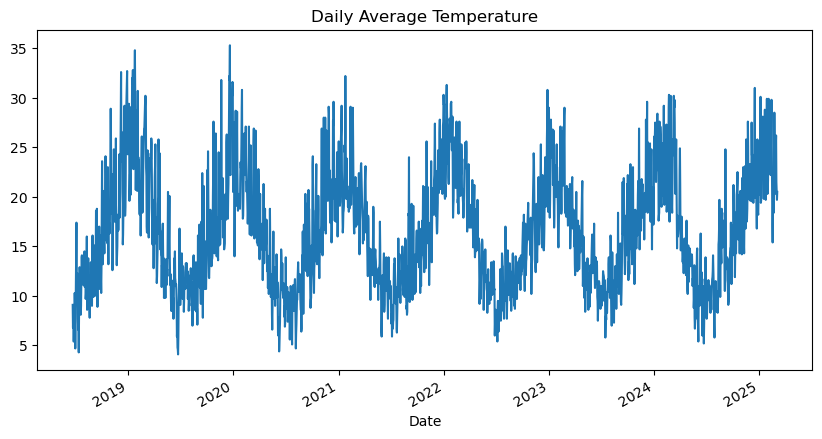

In [17]:
plt.figure(figsize=(10,5))
df.set_index("Date")["Air Temp degC - ave"].plot()
plt.title("Daily Average Temperature")
plt.show()


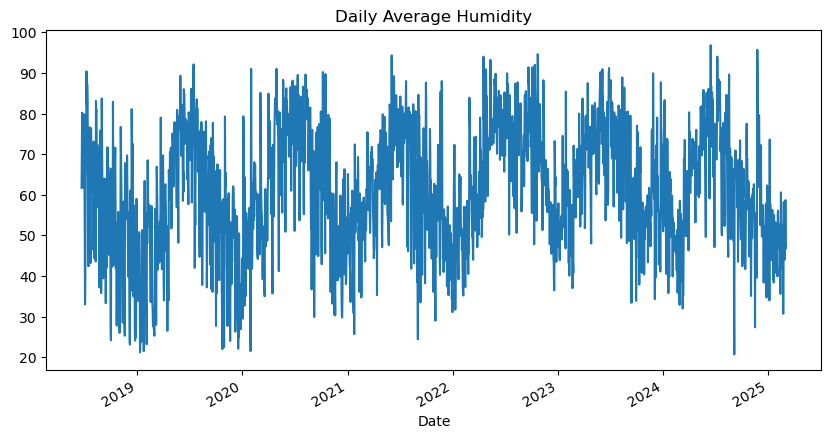

In [20]:
plt.figure(figsize=(10,5))
df.set_index("Date")["Humidity % - ave"].plot()
plt.title("Daily Average Humidity")
plt.show()

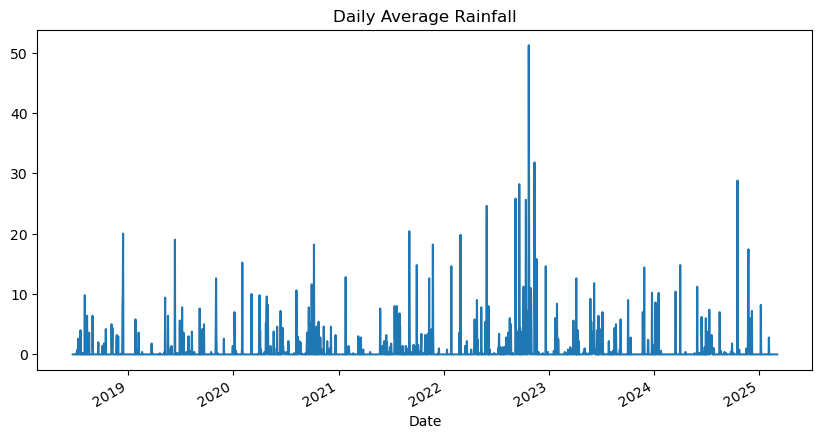

In [21]:
plt.figure(figsize=(10,5))
df.set_index("Date")["Rainfall mm - raw"].plot()
plt.title("Daily Average Rainfall")
plt.show()

/var/folders/cz/_2rhpg0x7_x620mkkm6cwfgm0000gn/T/ipykernel_63970/4189448937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


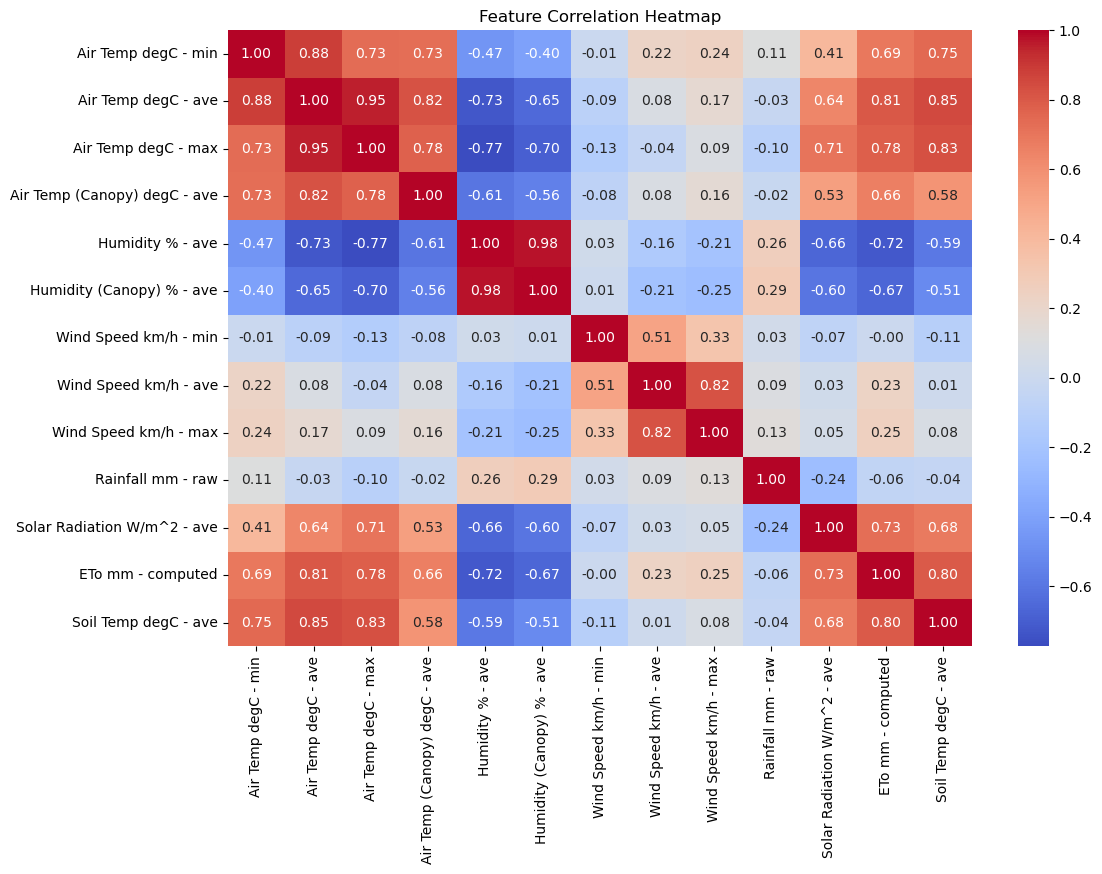

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()